In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('E:/jupyter notebook/ruc/编程基础/期末/data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df1 = data.copy(deep=True)
df1 = df1.drop(columns = ['RowNumber','CustomerId','Surname'])
df1 = df1.dropna()

In [16]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455
std,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


### 数据可视化

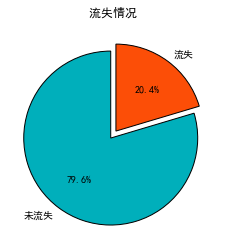

In [10]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负数轴标签显示问题

# 更新颜色方案
colors = ['#00AFBB', '#FC4E07']#,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  

# 计算客户流失和非流失的比例
fig,ax=plt.subplots()
churn_rates = df1['Exited'].value_counts(normalize=True) * 100  # 直接计算百分比
# 绘制饼图
plt.pie(churn_rates, labels=['未流失', '流失'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('流失情况 ')
plt.show()
fig.savefig('churn.png', dpi=300)

France     5012
Germany    2510
Spain      2476
Name: Geography, dtype: int64


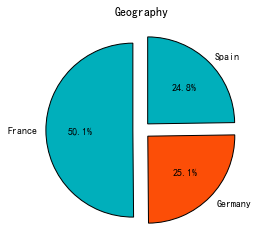

In [13]:
# 客户个人属性
Geography = df1['Geography'].value_counts()
print(Geography)
fig,ax=plt.subplots()
plt.pie(Geography,labels = ['France','Germany','Spain'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Geography')
fig.savefig('geography.png', dpi=300)

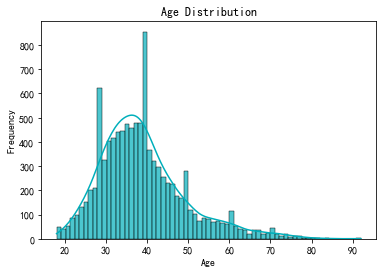

In [14]:
fig,ax=plt.subplots()
sns.histplot(data=df1,x='Age', bins='auto', color=colors[0],alpha=0.7, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
fig.savefig('age.png', dpi=300)

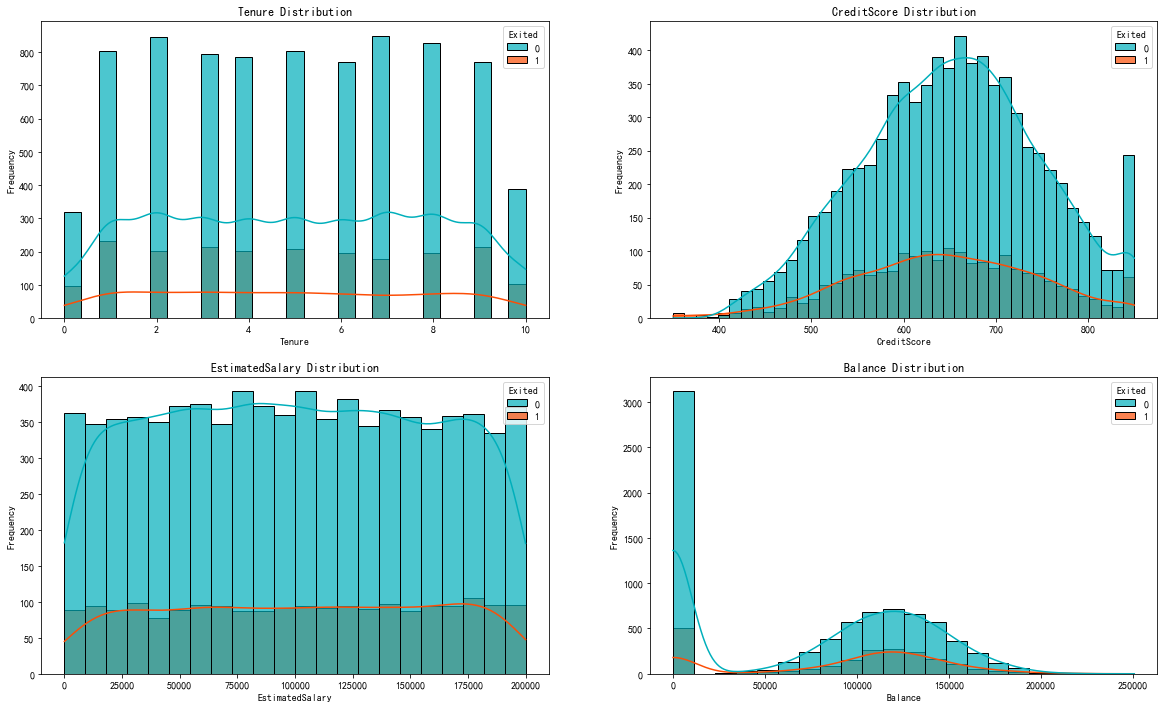

In [15]:
# 客户行为
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
features =['Tenure','CreditScore','EstimatedSalary','Balance']
for i in range(4):   
    plt.subplot(2,2,i+1)
    sns.histplot(data=df1,x=features[i],hue="Exited", bins='auto',  kde=True,palette=colors,alpha=0.7)
    plt.title(f'{features[i]} Distribution' )
    plt.xlabel(f'{features[i]}')
    plt.ylabel('Frequency')
    fig.savefig('features.png', dpi=300)

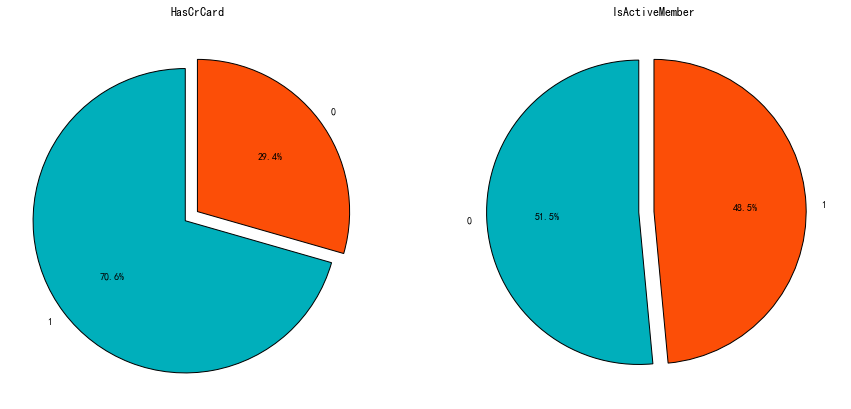

In [16]:
# 定义一个函数来计算并绘制饼图，减少重复代码
def calculate_and_plot_pie(data, column, labels, subplot_position, title, explode):
    counts = data[column].value_counts(normalize=True) * 100
    plt.subplot(1, 2, subplot_position)
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(title)

# 使用上述函数来绘制所有需要的饼图
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
calculate_and_plot_pie(df1, 'HasCrCard', ['1', '0'], 1, 'HasCrCard', (0.1, 0))
calculate_and_plot_pie(df1, 'IsActiveMember', ['0', '1'], 2, 'IsActiveMember', (0.1, 0))
fig.savefig('active.png', dpi=300)


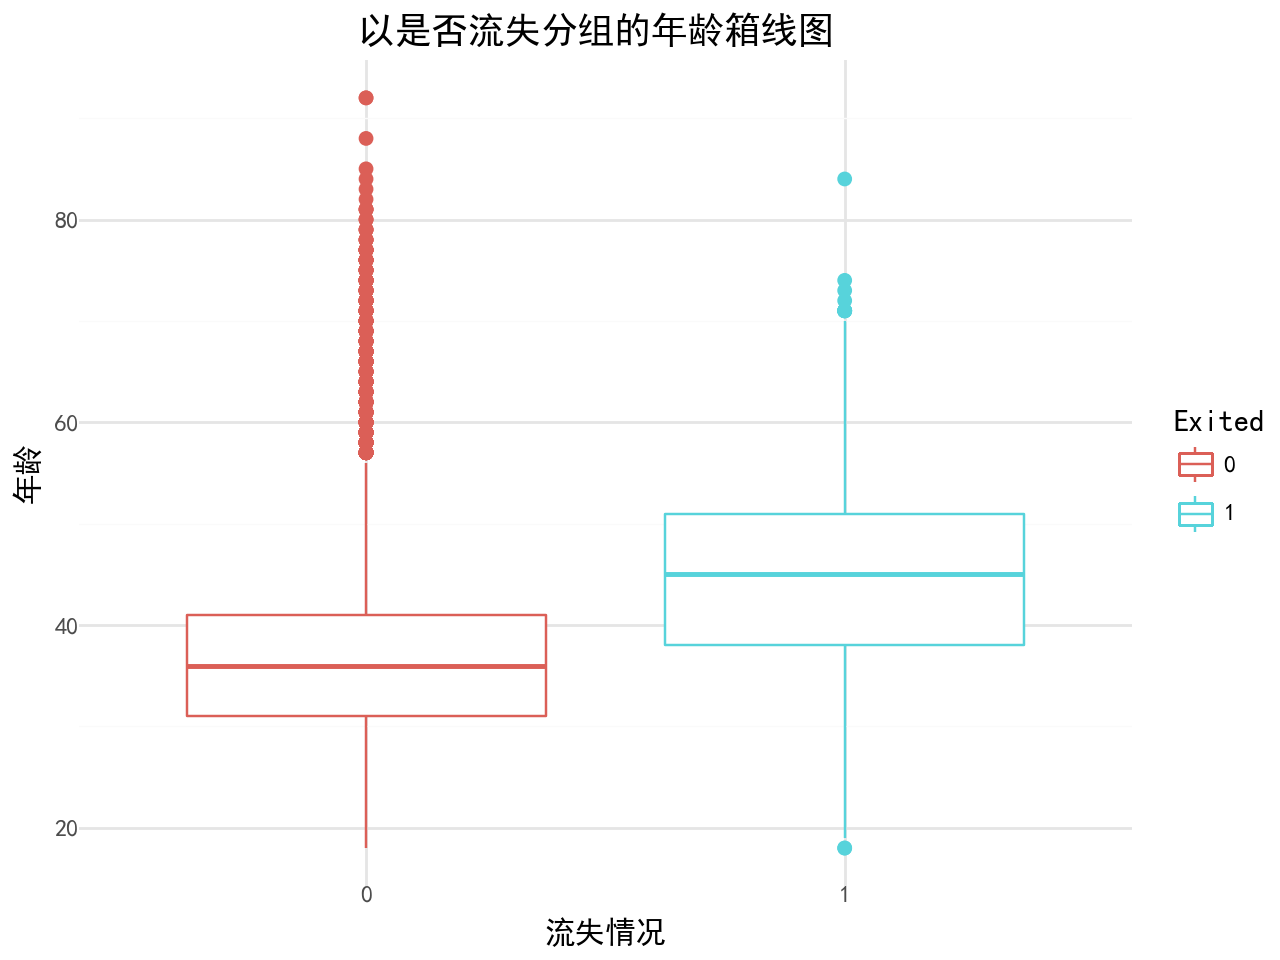

E:\Anaconda\lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
E:\Anaconda\lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: box.PNG


In [14]:
#以是否流失分组的年龄箱线图
df1['Exited'] = pd.Categorical(df1['Exited'])
gg=(
    ggplot(df1,aes(x='Exited',y='Age',color='Exited'))
    + geom_boxplot(outlier_size=2,outlier_shape='o' )
    + theme_minimal()
    + theme(text=element_text(family=['SimHei']))
    + labs(title='以是否流失分组的年龄箱线图 ',x='流失情况', y='年龄')
)
gg.show()
gg.save('box.PNG')

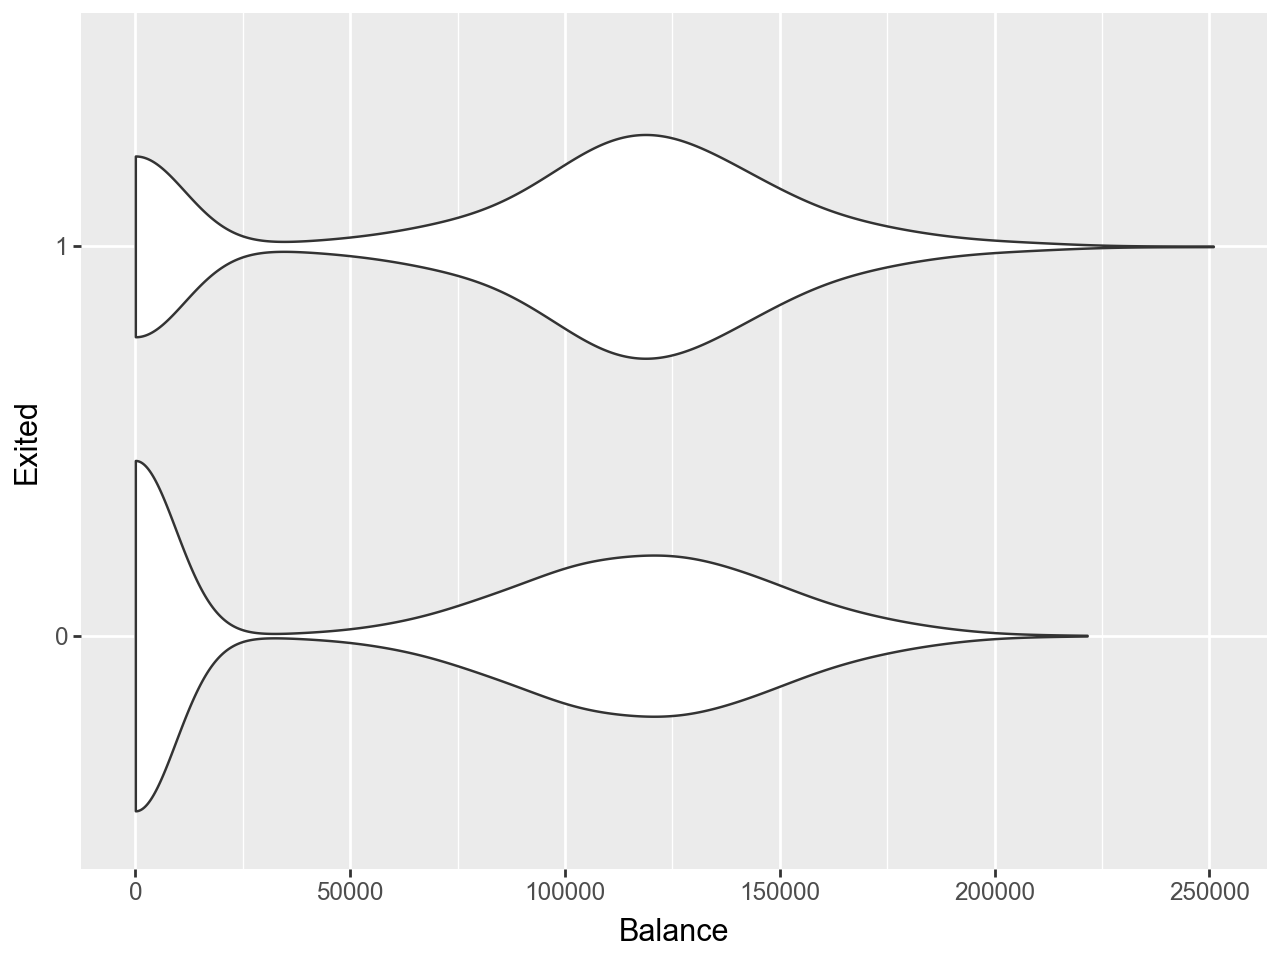

E:\Anaconda\lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
E:\Anaconda\lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: violin.PNG


In [15]:
#以是否流失分组的账户余额小提琴图
gg1=(
    ggplot(df1, aes('Exited', 'Balance'))
     + geom_violin()
     + coord_flip()
)
gg1.show()
gg1.save('violin.PNG')

### 数据预处理

In [5]:
# col 存储 df1 中所有列的名称
col = list(df1.columns)

# 使用列表推导式分别生成分类特征和数值特征列表
categorical_features = [i for i in col if len(df1[i].unique()) <= 11]
numerical_features = [i for i in col if len(df1[i].unique()) > 11]

# 使用中文注释说明代码意图
# 打印分类特征
print('Categorical Features:', *categorical_features)
# 打印数值特征
print('Numerical Features:', *numerical_features)

Categorical Features: Geography Gender Tenure NumOfProducts HasCrCard IsActiveMember Exited
Numerical Features: CreditScore Age Balance EstimatedSalary


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
class CustomLabelEncoder:
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit_transform(self, df):
        # 检查输入参数是否为 pd.DataFrame 类型
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame.")
        
        encoded_columns = []
        encoding_maps = {}  # 用于存储编码映射
        
        # 遍历每一列
        for column in df.columns:
            # 如果列的数据类型为整数，则直接添加到 encoded_columns 中
            if pd.api.types.is_float_dtype(df[column]):
                encoded_columns.append(df[column])
            elif pd.api.types.is_integer_dtype(df[column]):
                encoded_columns.append(df[column])
            else:
                # 如果不是整数类型，则使用 self.label_encoder 进行标签编码
                self.label_encoder.fit(df[column])
                encoded_series = self.label_encoder.transform(df[column])
                # 将编码后的结果作为一个新的 pd.Series 对象添加到 encoded_columns 中
                encoded_columns.append(pd.Series(encoded_series, name=column))
                # 保存编码映射
                encoding_maps[column] = dict(zip(self.label_encoder.classes_, self.label_encoder.transform(self.label_encoder.classes_)))
        
        # 使用 pd.concat 函数将所有编码后的列按列方向进行合并
        encoded_df = pd.concat(encoded_columns, axis=1)
        
        for column, map_ in encoding_maps.items():
            print(f"Encoding map for column '{column}': {map_}")
        
        # 返回新的数据集
        return encoded_df
    
# 创建 CustomLabelEncoder 实例
encoder = CustomLabelEncoder()

# 对数据进行标签编码
df1 = encoder.fit_transform(df1)

Encoding map for column 'Geography': {'France': 0, 'Germany': 1, 'Spain': 2}
Encoding map for column 'Gender': {'Female': 0, 'Male': 1}


In [10]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
5,645.0,1.0,0.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0


In [20]:
df1 = pd.get_dummies(df1, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

In [10]:
from sklearn.preprocessing import MinMaxScaler
for col in numerical_features:
    sc = MinMaxScaler()
    df1[col] = sc.fit_transform(df1[[col]])

In [11]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,2.0,0.000000,1.0,1.0,1.0,0.506735,1.0
1,0.516,2.0,0.0,0.310811,1.0,0.334031,1.0,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,8.0,0.636357,3.0,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,1.0,0.000000,2.0,0.0,0.0,0.469120,0.0
5,0.590,1.0,0.0,0.351351,8.0,0.453394,2.0,1.0,0.0,0.748797,1.0


使用SMOTE进行数据平衡：  
为了应对不平衡数据，有两个选择：

1. 下采样（Undersampling）：减少目标变量的多数类样本。
2. 过采样（Oversampling）：增加目标变量的少数类样本至多数类样本的数量。

在进行了下采样和过采样的尝试和错误之后，我们决定采用过采样！  
为了数据平衡，我们将使用imblearn库。  
pip命令：pip install imbalanced-learn

In [12]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [14]:
df1=df1.dropna()

In [15]:
# 使用SMOTE方法进行过采样以平衡数据集
over = SMOTE(sampling_strategy=1)

# 提取特征变量和目标变量
f1 = df1.iloc[:, :10].values
t1 = df1.iloc[:, 10].values

# 应用SMOTE算法
f1, t1 = over.fit_resample(f1, t1)

# 输出经过重采样后的目标变量分布
print(Counter(t1))

Counter({1.0: 7958, 0.0: 7958})


In [16]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2,random_state=42)

## 建模

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score, RocCurveDisplay, precision_recall_curve

def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # ROC 曲线
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', square=True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

最佳的参数组合为: {'max_iter': 50, 'solver': 'liblinear'}
Cross Validation Score:  76.48%
ROC_AUC Score:  69.56%


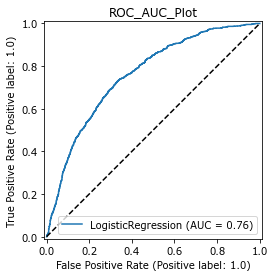

In [18]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression( random_state=42)
param_grid = {'max_iter': [ 50,100,300], 
               'solver': ['newton-cg','liblinear']}

# 使用GridSearchCV执行交叉验证来选择最佳的参数
grid_search = GridSearchCV(estimator=model_logreg, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
 # 打印最佳的参数组合
best_params = grid_search.best_params_
print(f"最佳的参数组合为: {best_params}")
# 使用最佳的参数组合训练最终模型
classifier_logreg = LogisticRegression(random_state=42, **best_params)
model(classifier_logreg,x_train,y_train,x_test,y_test)

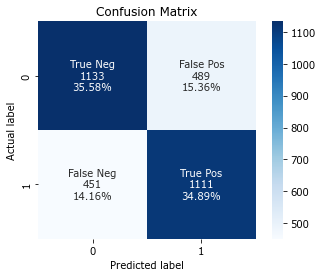

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71      1622
         1.0       0.69      0.71      0.70      1562

    accuracy                           0.70      3184
   macro avg       0.70      0.70      0.70      3184
weighted avg       0.71      0.70      0.70      3184



In [31]:
model_evaluation(classifier_logreg,x_test,y_test)

最佳的参数组合为: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross Validation Score:  95.16%
ROC_AUC Score:  88.67%


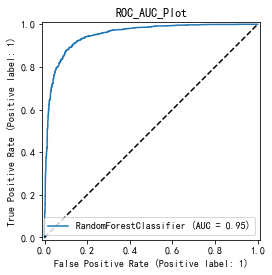

In [108]:
from sklearn.ensemble import RandomForestClassifier  
# 创建一个随机森林模型
random_forest_model = RandomForestClassifier(random_state=42)
# 设置参数的候选值范围
param_grid = {'n_estimators': [ 50,100,200], 
                'max_depth': [10, 20],
                'min_samples_split': [2, 8,10],
                'min_samples_leaf': [1, 2, 4]}

# 使用GridSearchCV执行交叉验证来选择最佳的参数
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
 # 打印最佳的参数组合
best_params = grid_search.best_params_
print(f"最佳的参数组合为: {best_params}")
# 使用最佳的参数组合训练最终模型
classifier_rf = RandomForestClassifier(random_state=42, **best_params)
model(classifier_rf,x_train,y_train,x_test,y_test)

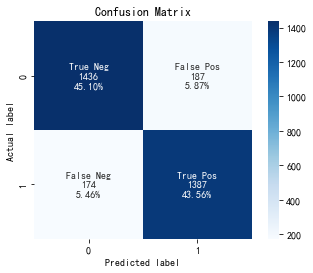

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1623
           1       0.88      0.89      0.88      1561

    accuracy                           0.89      3184
   macro avg       0.89      0.89      0.89      3184
weighted avg       0.89      0.89      0.89      3184



In [112]:
model_evaluation(classifier_rf,x_test,y_test)

最佳的参数组合为: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800}
Cross Validation Score:  95.32%
ROC_AUC Score:  87.82%


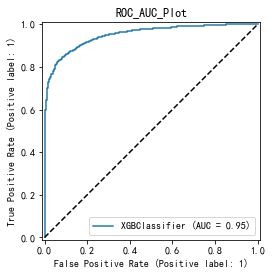

In [110]:
from xgboost import XGBClassifier
# 创建一个XGB模型
xgb_model = XGBClassifier(random_state=42)
# 设置参数的候选值范围
param_grid = {'n_estimators': [ 500,800,1000], 
                'max_depth': [3,5],
                'learning_rate' :[0.01,0.1]}

# 使用GridSearchCV执行交叉验证来选择最佳的参数
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
 # 打印最佳的参数组合
best_params = grid_search.best_params_
print(f"最佳的参数组合为: {best_params}")
# 使用最佳的参数组合训练最终模型
classifier_xgb = XGBClassifier(random_state=42, **best_params)
model(classifier_xgb,x_train,y_train,x_test,y_test)

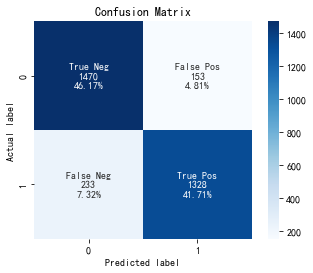

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1623
           1       0.90      0.85      0.87      1561

    accuracy                           0.88      3184
   macro avg       0.88      0.88      0.88      3184
weighted avg       0.88      0.88      0.88      3184



In [111]:
model_evaluation(classifier_xgb,x_test,y_test)